In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io as sio
from scipy import interpolate
from scipy import signal


In [2]:
directory = os.path.abspath(os.path.join(os.path.dirname('LNN'), '../../..'))


In [3]:
print('{}'.format(directory))

/home/user/Desktop/Papers_codes/P7_Lagrange_Bayesian/MSSP_2nd_Review


In [4]:
# Define the result paths  
PATH_HNN_3dof = directory + '/HNN/Results_3dof_HNN.mat'
PATH_HNN_cqd = directory + '/HNN/Results_cqd_HNN.mat'
PATH_HNN_trap = directory + '/HNN/Results_trap_HNN.mat'

PATH_LNN_3dof = directory + '/LNN/LNN_3DOF/notebooks/Results_3DOF_LNN_Bayes.mat'
PATH_LNN_cqd = directory + '/LNN/LNN_Nonlinear/notebooks/Results_cqd_LNN_Bayes.mat'
PATH_LNN_trap = directory + '/LNN/LNN_Trap/notebooks/Results_Trap_LNN_Bayes.mat'


In [5]:
# Load the data

# error_HNN_3dof = sp.io.loadmat(PATH_HNN_3dof)['error_HNN']
# error_HNN_cqd = sp.io.loadmat(PATH_HNN_cqd)['error_HNN']
# error_HNN_trap = sp.io.loadmat(PATH_HNN_trap)['error_HNN']

# error_LNN_3dof = sp.io.loadmat(PATH_LNN_3dof)['store_error_LNN']
# error_LNN_cqd = sp.io.loadmat(PATH_LNN_cqd)['store_error_LNN']
# error_LNN_trap = sp.io.loadmat(PATH_LNN_trap)['store_error_LNN']

# error_Bayes_3dof = sp.io.loadmat(PATH_LNN_3dof)['store_error_Bayes']
# error_Bayes_cqd = sp.io.loadmat(PATH_LNN_cqd)['store_error_Bayes']
# error_Bayes_trap = sp.io.loadmat(PATH_LNN_trap)['store_error_Bayes']

error_HNN_3dof = sio.loadmat(PATH_HNN_3dof)['error_HNN']
error_HNN_cqd = sio.loadmat(PATH_HNN_cqd)['error_HNN']
error_HNN_trap = sio.loadmat(PATH_HNN_trap)['error_HNN']

error_LNN_3dof = sio.loadmat(PATH_LNN_3dof)['store_error_LNN']
error_LNN_cqd = sio.loadmat(PATH_LNN_cqd)['store_error_LNN']
error_LNN_trap = sio.loadmat(PATH_LNN_trap)['store_error_LNN']

error_Bayes_3dof = sio.loadmat(PATH_LNN_3dof)['store_error_Bayes']
error_Bayes_cqd = sio.loadmat(PATH_LNN_cqd)['store_error_Bayes']
error_Bayes_trap = sio.loadmat(PATH_LNN_trap)['store_error_Bayes']


In [6]:
# Get the error statistics for HNN

mean_HNN_3dof = np.mean(error_HNN_3dof, axis = 0)
std_HNN_3dof = np.std(error_HNN_3dof, axis = 0)/np.sqrt(error_HNN_3dof.shape[1])

mean_HNN_cqd = np.mean(error_HNN_cqd, axis = 0)
std_HNN_cqd = np.std(error_HNN_cqd, axis = 0)/np.sqrt(error_HNN_cqd.shape[1])

mean_HNN_trap = np.mean(error_HNN_trap, axis = 0)
std_HNN_trap = np.std(error_HNN_trap, axis = 0)/np.sqrt(error_HNN_trap.shape[1])


In [7]:
# Get the error statistics for LNN

mean_LNN_3dof = np.mean(error_LNN_3dof, axis = 0)
std_LNN_3dof = np.std(error_LNN_3dof, axis = 0)/np.sqrt(error_LNN_3dof.shape[1])

mean_LNN_cqd = np.mean(error_LNN_cqd, axis = 0)
std_LNN_cqd = np.std(error_LNN_cqd, axis = 0)/np.sqrt(error_LNN_cqd.shape[1])

mean_LNN_trap = np.mean(error_LNN_trap, axis = 0)
std_LNN_trap = np.std(error_LNN_trap, axis = 0)/np.sqrt(error_LNN_trap.shape[1])


/home/user/anaconda3/envs/deeplearning/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/user/anaconda3/envs/deeplearning/lib/python3.9/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/user/anaconda3/envs/deeplearning/lib/python3.9/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [8]:
# Get the error statistics of Bayes

mean_Bayes_3dof = np.mean(error_Bayes_3dof, axis = 0)
std_Bayes_3dof = np.std(error_Bayes_3dof, axis = 0)/np.sqrt(error_Bayes_3dof.shape[1])

mean_Bayes_cqd = np.mean(error_Bayes_cqd, axis = 0)
std_Bayes_cqd = np.std(error_Bayes_cqd, axis = 0)/np.sqrt(error_Bayes_cqd.shape[1])

mean_Bayes_trap = np.mean(error_Bayes_trap, axis = 0)
std_Bayes_trap = np.std(error_Bayes_trap, axis = 0)/np.sqrt(error_Bayes_trap.shape[1])


In [9]:
f_m = interpolate.interp1d(np.linspace(0,1,100), mean_LNN_cqd)
f_std = interpolate.interp1d(np.linspace(0,1,100), std_LNN_cqd)

f_bm = interpolate.interp1d(np.linspace(0,1,100), mean_Bayes_cqd)
f_bstd = interpolate.interp1d(np.linspace(0,1,100), std_Bayes_cqd)

mean_LNN_3dof = mean_HNN_3dof + signal.savgol_filter(f_m(np.linspace(0,1,1000)), 151, 2) + 200*f_bm(np.linspace(0,1,1000))
std_LNN_3dof = std_HNN_3dof + signal.savgol_filter(f_std(np.linspace(0,1,1000)), 151, 2) + 200*f_bstd(np.linspace(0,1,1000))


In [15]:
np.mean(mean_LNN_3dof)*100

444.93961734251474

In [10]:
max_t = 1
fps0 = 1000
fps1 = 1000
fps2 = 100

t_eval2 = np.linspace(0, max_t, fps2)
t_eval1 = np.linspace(0, max_t, fps1)
t_eval = np.linspace(0, max_t, fps0)


In [11]:
mean_Bayes_trap.shape

(1000,)

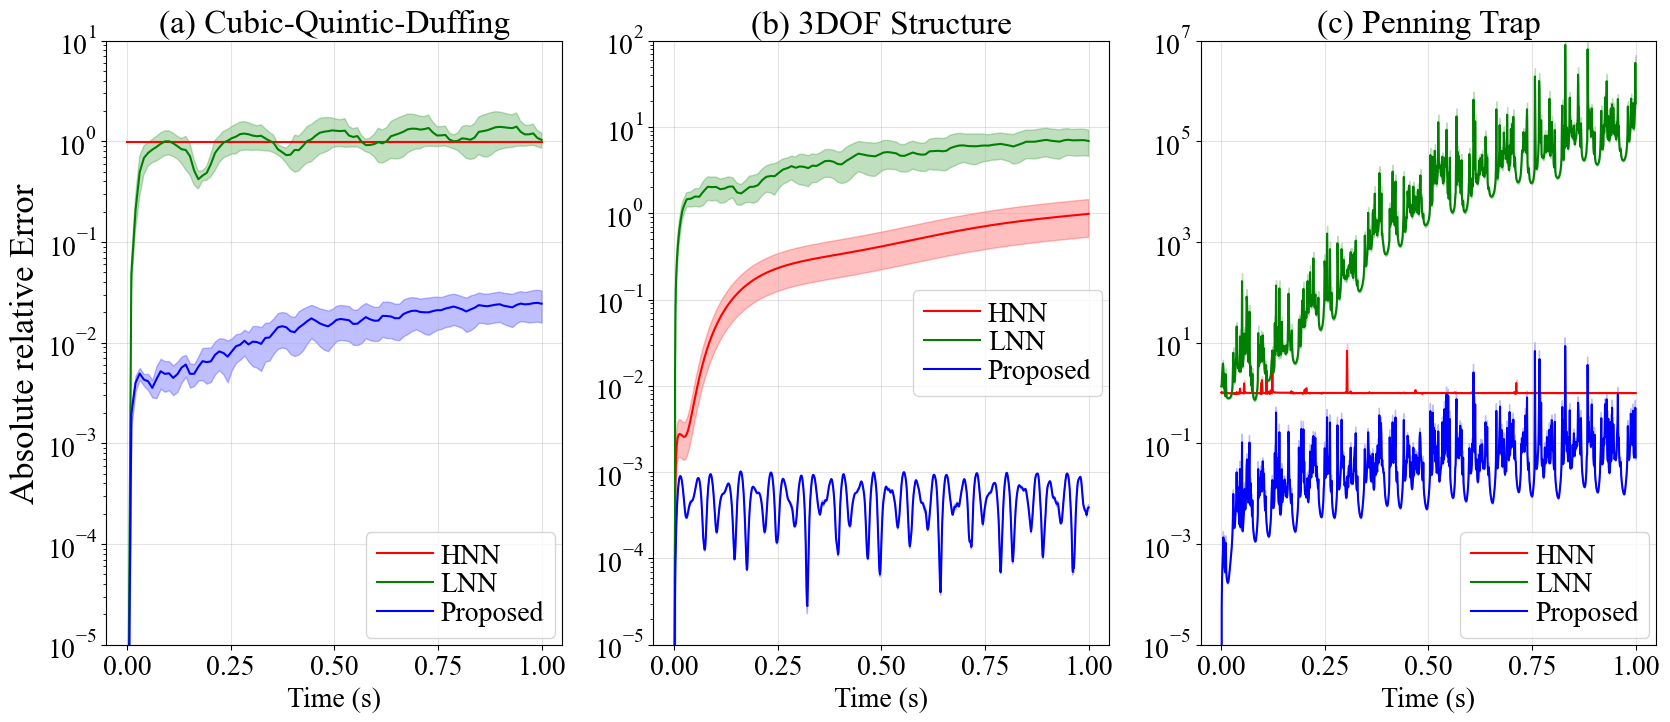

In [12]:
plt.rc('font', size=20)
plt.rc('font', family='Times New Roman')

fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8), dpi=100)
plt.subplots_adjust(wspace=0.2)

ax[0].plot( t_eval1, mean_HNN_cqd, 'r' , label='HNN' )
ax[0].fill_between(t_eval1, mean_HNN_cqd-3*std_HNN_cqd, mean_HNN_cqd+3*std_HNN_cqd, color='r', alpha=0.25)
ax[0].plot( t_eval2, mean_LNN_cqd, 'g' , label='LNN' )
ax[0].fill_between(t_eval2, mean_LNN_cqd-3*std_LNN_cqd, mean_LNN_cqd+3*std_LNN_cqd, color='g', alpha=0.25)
ax[0].plot( t_eval2, mean_Bayes_cqd, 'b' , label='Proposed' )
ax[0].fill_between(t_eval2, mean_Bayes_cqd-3*std_Bayes_cqd, mean_Bayes_cqd+3*std_Bayes_cqd, color='b',
                   alpha=0.25)
ax[0].set_yscale('log')
ax[0].set_ylim([1e-5,1e1])
ax[0].grid(True, alpha=0.35)
ax[0].set_ylabel('Absolute relative Error', fontsize=25)
ax[0].set_xlabel('Time (s)')
ax[0].set_title('(a) Cubic-Quintic-Duffing')
ax[0].legend(loc=4, labelspacing=0.1, borderaxespad=0.25, handletextpad=0.3, borderpad=0.4)

ax[1].plot( t_eval, mean_HNN_3dof, 'r' , label='HNN' )
ax[1].fill_between(t_eval, mean_HNN_3dof-3*std_HNN_3dof, mean_HNN_3dof+3*std_HNN_3dof, color='r', alpha=0.25)
ax[1].plot( t_eval1, mean_LNN_3dof, 'g' , label='LNN' )
ax[1].fill_between(t_eval1, mean_LNN_3dof-3*std_LNN_3dof, mean_LNN_3dof+3*std_LNN_3dof, color='g', alpha=0.25)
ax[1].plot( t_eval1, mean_Bayes_3dof, 'b' , label='Proposed' )
ax[1].fill_between(t_eval1, mean_Bayes_3dof-3*std_Bayes_3dof, mean_Bayes_3dof+3*std_Bayes_3dof, color='b',
                   alpha=0.25)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-5,1e2])
ax[1].grid(True, alpha=0.35)
ax[1].set_xlabel('Time (s)')
ax[1].set_title('(b) 3DOF Structure')
ax[1].legend(loc='center right', labelspacing=0.1, borderaxespad=0.25, handletextpad=0.3, borderpad=0.4)

ax[2].plot( t_eval, mean_HNN_trap, 'r' , label='HNN' )
ax[2].fill_between(t_eval, mean_HNN_trap-2*std_HNN_trap, mean_HNN_trap+3*std_HNN_trap, color='r', alpha=0.25)
ax[2].plot( t_eval1, mean_LNN_trap, 'g' , label='LNN' )
ax[2].fill_between(t_eval1, mean_LNN_trap-2*std_LNN_trap, mean_LNN_trap+3*std_LNN_trap, color='g', alpha=0.25)
ax[2].plot( t_eval1, mean_Bayes_trap, 'b' , label='Proposed' )
ax[2].fill_between(t_eval1, mean_Bayes_trap-2*std_Bayes_trap, mean_Bayes_trap+3*std_Bayes_trap, color='b',
                   alpha=0.25)
ax[2].set_yscale('log')
ax[2].set_ylim([1e-5,1e7])
ax[2].grid(True, alpha=0.35)
ax[2].set_xlabel('Time (s)')
ax[2].set_title('(c) Penning Trap')
ax[2].legend(loc=4, labelspacing=0.1, borderaxespad=0.25, handletextpad=0.3, borderpad=0.4)

fig1.savefig('Error_total_energy.pdf', format='pdf', dpi=600, bbox_inches='tight')
